In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import pandas as pd
from scipy import interpolate
import math
df = pd.read_csv('bending_moduli_IMM_OMM.dat', delim_whitespace=True, names= ["Lipid", "Value", "SE"] )
#de = pd.read_csv('bending_moduli_IMM_OMM_additive.dat ', delim_whitespace=True, names= ["Lipid1", "Value1"])

In [9]:
import sympy as sp
from scipy import interpolate
import math
#Libraries needed to run the tool
import numpy as np
import pandas as pd
#import mdtraj as md
import matplotlib
import matplotlib as mpl
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage #for dendrogram specifically
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
sns.set(style='white')
from pylab import *
import pylab
from scipy.optimize import curve_fit

In [27]:
df = pd.read_csv('bending_moduli_IMM_OMM.dat', delim_whitespace=True, names= ["Lipid", "Value", "SE"] )
de = pd.read_csv('bending_moduli_IMM_OMM_additive.dat', delim_whitespace=True, header=None, names= ["Lipid1", "Value1"])

In [15]:
de

,Lipid1,Value1
0,IMM-tail-(fly),14.8034
1,OMM-tail-(fly),14.2802
2,IMM-head-(fly),15.0545
3,OMM-head-(fly),13.8460
4,IMM-(mammal),15.8990
5,OMM-(Mammal),14.8985


In [21]:
Value1 = de ['Value1']
Value1

0    14.8034
1    14.2802
2    15.0545
3    13.8460
4    15.8990
5    14.8985
Name: Value1, dtype: float64

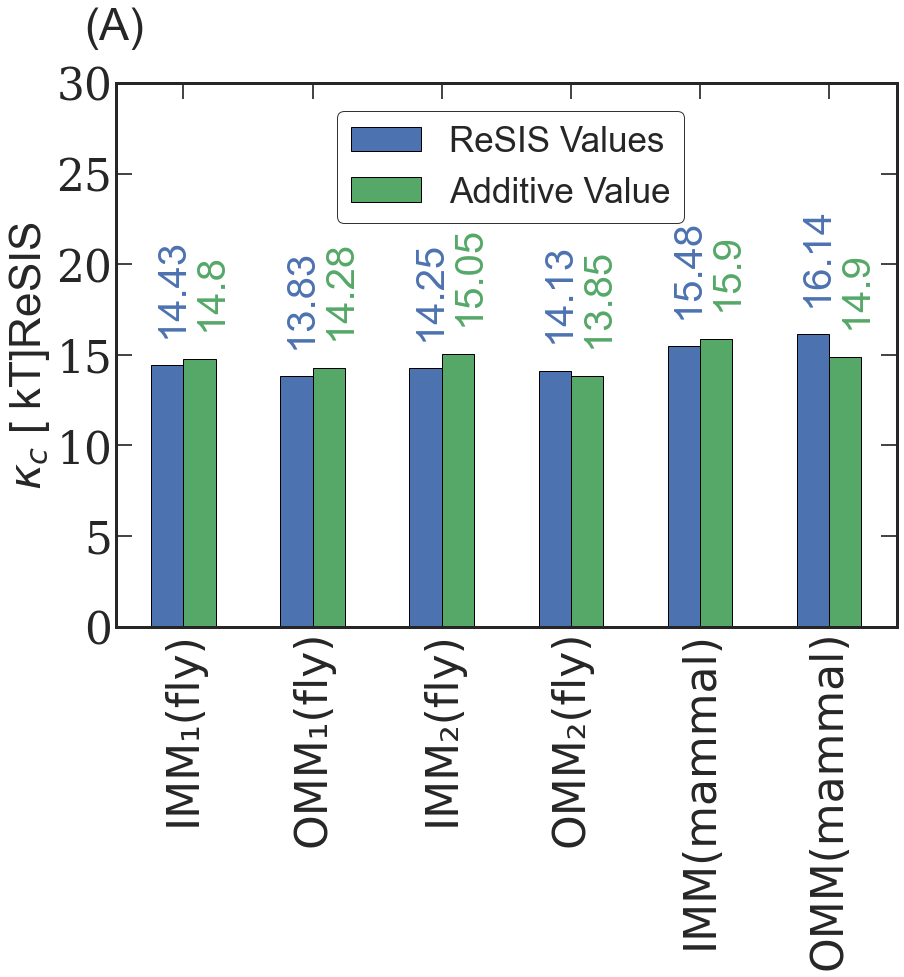

In [101]:
fig = plt.figure(1034, figsize=(14,10))
ax = fig.add_subplot(111)
Lipid = df['Lipid']
Lipid1 = de ['Lipid1']
Value1 = de ['Value1']
#Value = df['Value']
# Read value for 2 decimal point
Value = round(df['Value'], 2)
Value1 = round(de['Value1'], 2)

n=6
r = np.arange(n)
width = 0.25
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)
#plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
A = r'IMM{}(fly)'.format(get_sub('1'))
B = r'OMM{}(fly)'.format(get_sub('1'))
C = r'IMM{}(fly)'.format(get_sub('2'))
D = r'OMM{}(fly)'.format(get_sub('2'))
E = r'IMM(mammal)'.format(get_sub('1'))
F = r'OMM(mammal)'.format(get_sub('1'))
Lipid = (A,B,C,D,E,F)
# This is the location for the annotated text
i = 1.1
j = 2
# Annotating the bar plot with the values in column(Value)
for i in range(len(Lipid)):
#    plt.annotate(Value[i], (-0.1 + i, Value[i] + j))
    plt.annotate(Value[i], (-0.1+i,Value[i] + j),rotation=90, color='b', fontsize=40, fontname='arial')
    
for i in range(len(Lipid1)):
#    plt.annotate(Value[i], (-0.1 + i, Value[i] + j))
    plt.annotate(Value1[i], (0.2+i,Value1[i] + j),rotation=90, color='g', fontsize=40, fontname='arial')
    
#thick axes
from pylab import *
rc('axes', linewidth=3)    

#plt.xticks(rotation=90, horizontalalignment="center", fontsize=44, fontname='arial')
plt.ylim([0, 30.001])
plt.yticks(np.arange(0, 30.001, 5 ), fontsize=44, fontname='serif')
#plt.title("Membrane bending moduli", fontsize=24, fontname='arial')
#plt.ylabel("κ[ kT]ReSIS",loc='center',fontsize=38, fontname='arial')
plt.ylabel('$\kappa_c$ [ kT]ReSIS',loc='center',fontsize=44, fontname='arial')
plt.tick_params(axis ='both', which= 'major', labelsize=44, direction='in', length=16, top=1, bottom=1, right=1, left=1, width=1.7)
plt.xticks(r + width/2, Lipid, rotation=90, horizontalalignment="center", fontsize=44, fontname='scan-serif')
#plt.bar(Lipid, Value, yerr=STD, width= 0.3, alpha=0.5, align='center',color='blue', edgecolor = 'black', capsize=10)
plt.bar(r, Value, color = 'b',
        width = width, edgecolor = 'black',
        label='ReSIS Values')
plt.bar(r + width, Value1, color = 'g',
        width = width, edgecolor = 'black',
        label='Additive Value')
#plt.bar(Lipid, Value, width= 0.32, align='center',color='blue', edgecolor = 'black')
#plt.bar(Lipid1, Value1, color="red", label='DIS', width= 0.32, align='center', color='red', edgecolor = 'black')
plt.title("(A)", loc = 'left', y=1.07, x=-0.04, fontsize=45, fontname='arial')
plt.legend(('ReSIS Values', 'Additive Value'), fontsize=35, loc='best', bbox_to_anchor=(0.25, 0.48, 0.5, 0.5), edgecolor='black')
# Saving the plot as a 'png'
#plt.savefig('Barplot_new.pdf',bbox_inches='tight', dpi=600)
plt.savefig('BarPlot_compare.jpg', bbox_inches='tight', dpi=600)
# Displaying the bar plot
plt.show()